### Access libraries that will be used

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored

### Load file into data frame and inspect for adequacy

In [2]:
pd.set_option('display.max_rows', None)
magic=pd.read_csv(r'p:\\stats.csv')
magic.head()

,FirstName,LastName,ID,Age,Pos,Date,Tm,H/A,Opp,W/L,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,BPM
0,Nikola,Vucevic,vucevni01,30-104,C,2/5/2021,ORL,NaN,CHI,W,...,3,16,19,4,0,1,1,2,43,14.2
1,Nikola,Vucevic,vucevni01,30-084,C,1/16/2021,ORL,@,BRK,L,...,4,6,10,7,5,0,4,4,34,18.5
2,Nikola,Vucevic,vucevni01,30-066,C,12/29/2020,ORL,@,OKC,W,...,3,7,10,5,1,0,1,0,28,13.7
3,Nikola,Vucevic,vucevni01,30-077,C,1/9/2021,ORL,@,DAL,L,...,3,12,15,2,2,0,0,3,30,14.5
4,Nikola,Vucevic,vucevni01,30-070,C,1/2/2021,ORL,NaN,OKC,L,...,2,11,13,2,0,0,1,1,30,13.0


In [3]:
magic.tail()

,FirstName,LastName,ID,Age,Pos,Date,Tm,H/A,Opp,W/L,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,BPM
249,Gary,Clark,clarkga01,26-063,F,1/18/2021,ORL,@,NYK,L,...,0,2,2,0,0,1,0,1,0,-15.3
250,Gary,Clark,clarkga01,26-053,F,1/8/2021,ORL,@,HOU,L,...,0,4,4,0,0,1,2,1,0,-15.8
251,Aaron,Gordon,gordoaa01,25-133,F,1/27/2021,ORL,NaN,SAC,L,...,1,4,5,5,0,0,4,4,3,-19.5
252,Dwayne,Bacon,bacondw01,25-141,G,1/18/2021,ORL,@,NYK,L,...,0,1,1,1,0,0,1,5,2,-18.3
253,Dwayne,Bacon,bacondw01,25-147,G,1/24/2021,ORL,NaN,CHO,L,...,0,3,3,2,0,0,3,4,2,-26.7


### Display data using histogram, swarmplot, and boxplot

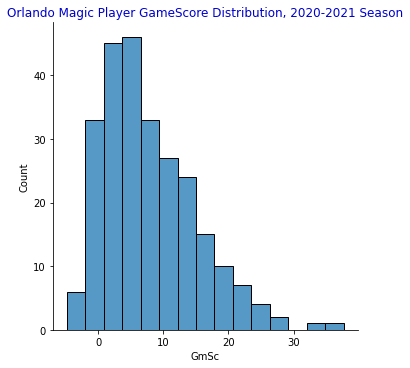

In [4]:
sns.displot(magic['GmSc'])
plt.title("Orlando Magic Player GameScore Distribution, 2020-2021 Season", color='mediumblue')
plt.show()

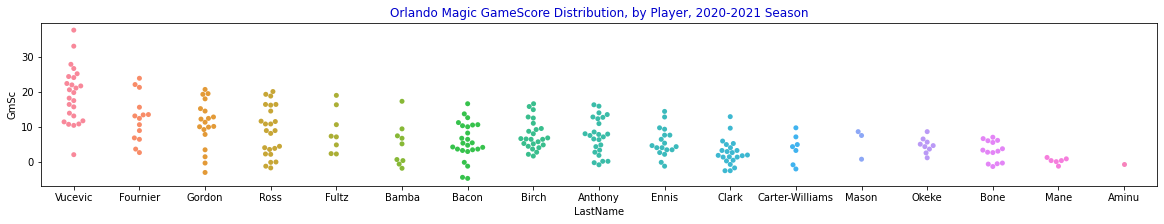

In [5]:
fig, ax = plt.subplots(figsize=(20,3))
sns.swarmplot(x="LastName", y="GmSc", data=magic)
plt.title("Orlando Magic GameScore Distribution, by Player, 2020-2021 Season", color='mediumblue')
plt.show()

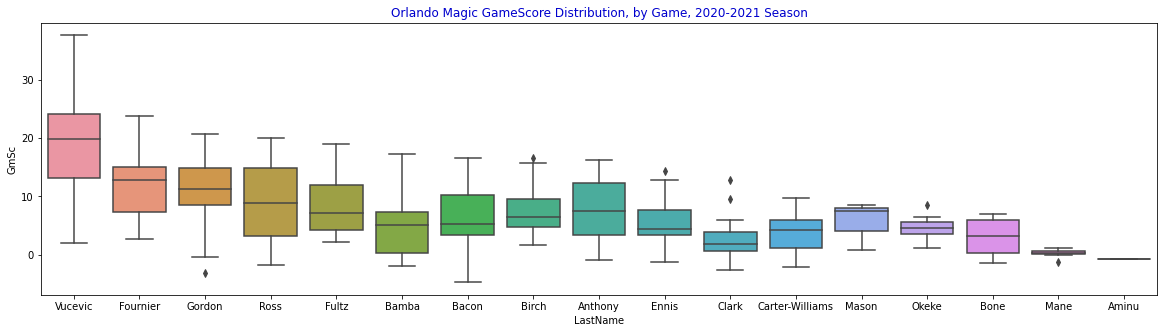

In [6]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x="LastName", y="GmSc", data=magic)
plt.title("Orlando Magic GameScore Distribution, by Game, 2020-2021 Season", color='mediumblue')
plt.show()

GameScore versus Minutes Played, by Player


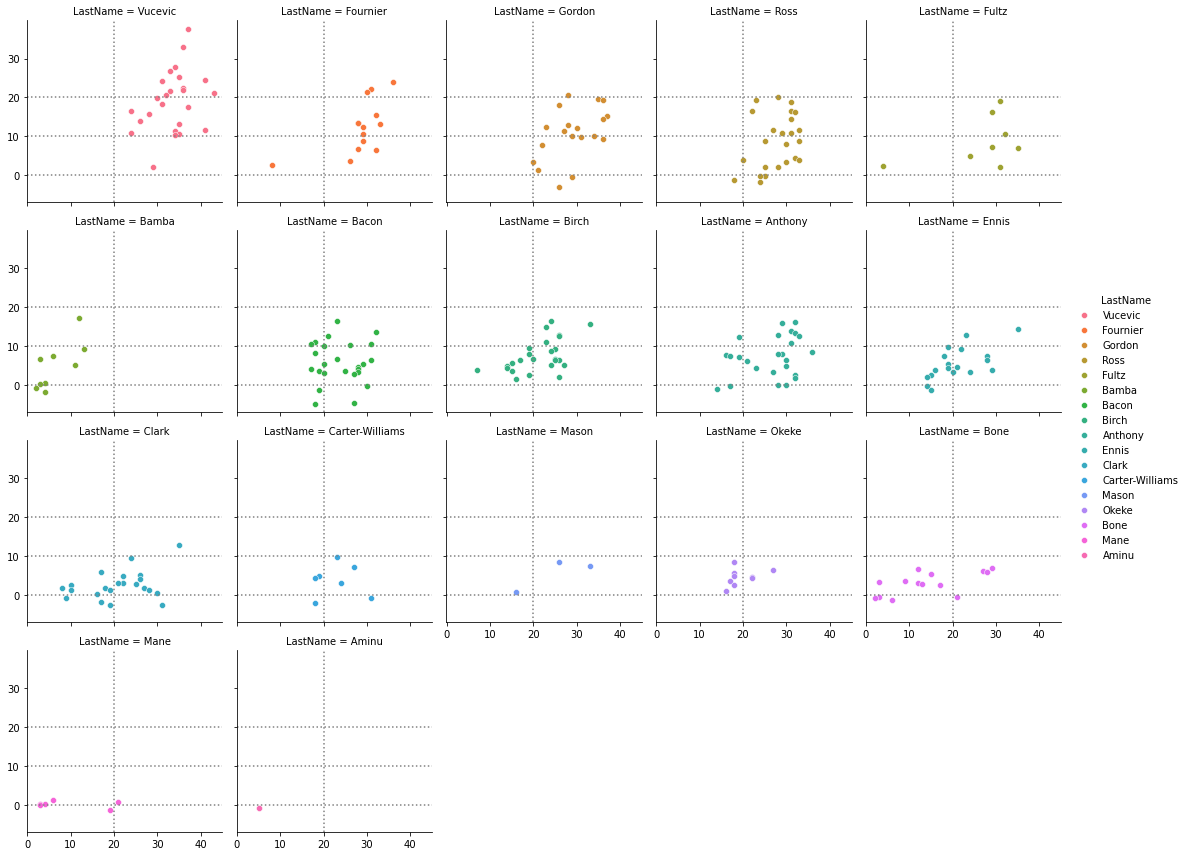

In [8]:
grid = sns.FacetGrid(magic, col = 'LastName', hue = 'LastName', col_wrap=5)
grid.map(sns.scatterplot, 'MP', 'GmSc')
grid.map(plt.axhline, y=10, ls=":", c=".5")
grid.map(plt.axhline, y=20, ls=":", c=".5")
grid.map(plt.axhline, y=0, ls=":", c=".5")
grid.map(plt.axvline, x=20, ls=":", c=".5")
grid.add_legend()
print ("\033[1m"+(colored("GameScore versus Minutes Played, by Player", 'blue'))+"\033[0m")
plt.show() 
# Minutes played on x-axis, GameScore on y-axis

c:\software\wpy64-3860\python-3.8.6.amd64\lib\site-packages\seaborn\axisgrid.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(**kwargs)


GameScore versus Date Game Played, by GmSc Rank


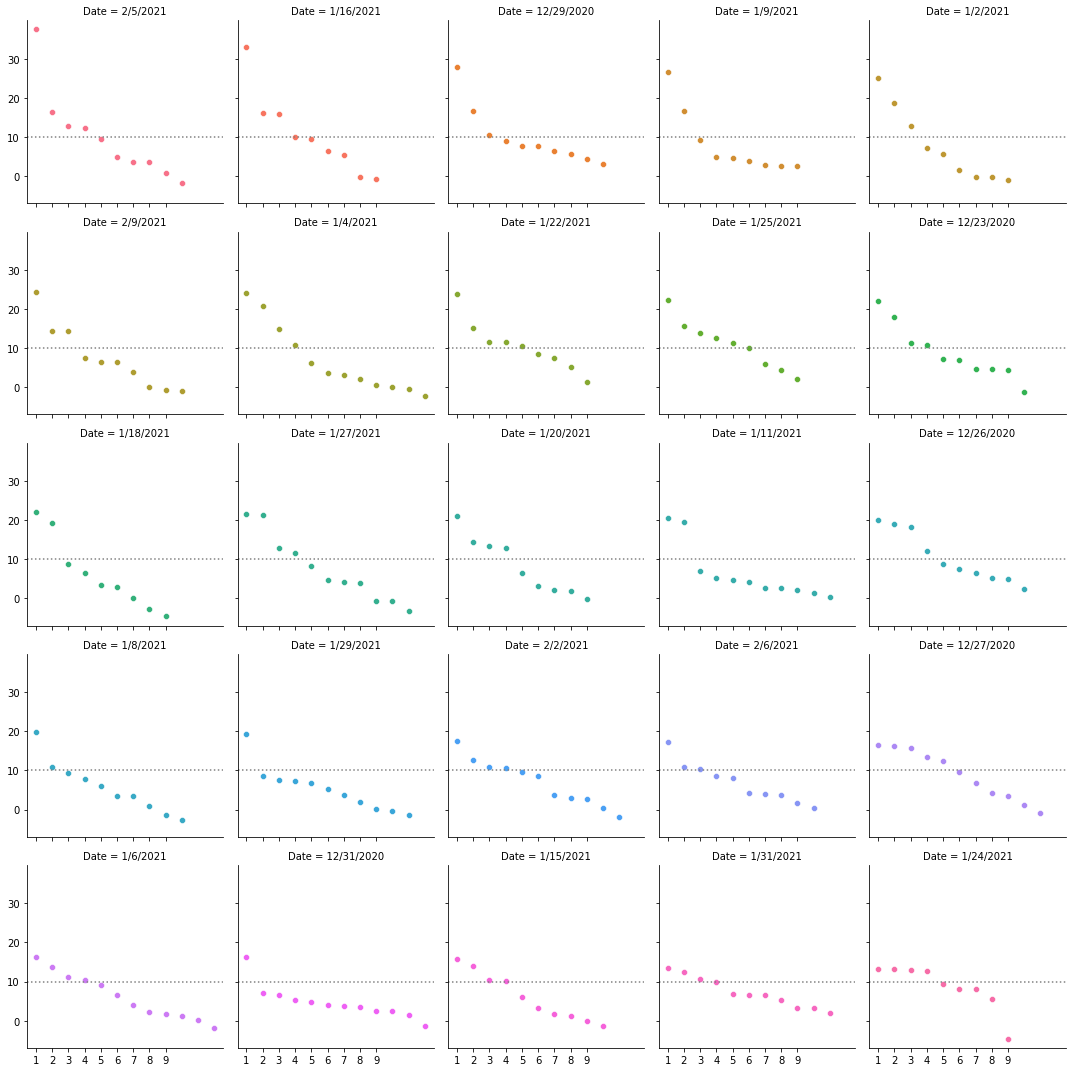

In [9]:
grid = sns.FacetGrid(magic, col = 'Date', hue = 'Date', col_wrap=5)
grid.map(sns.scatterplot, 'LastName', 'GmSc')
grid.set(xlabel="Player", ylabel="GameScore")
grid.set(xticklabels=[1,2,3,4,5,6,7,8,9,10,11])
grid.map(plt.axhline, y=10, ls=":", c=".5")
print ("\033[1m"+(colored("GameScore versus Date Game Played, by GmSc Rank", 'blue'))+"\033[0m")
plt.show() 
# x-axis shows highest GmSc on left, lowest on right for each game. Games ordered by highest game score (in the #1 position on x-axis)
# GmSc of >= 10 are considered above average performace. Points above the dashed line are 'above average'performances.

### Calculate each player's average gamescore, standard dev., and quartiles

In [10]:
print ("\033[1m"+(colored("Descriptive Statistics for GameScore, by Player", 'blue'))+"\033[0m")
magic[['LastName','GmSc']].\
groupby(['LastName'], as_index=True).describe()

Descriptive Statistics for GameScore, by Player


GmSc                                                       
                count       mean       std  min     25%    50%     75%   max
LastName                                                                    
Aminu             1.0  -0.800000       NaN -0.8  -0.800  -0.80  -0.800  -0.8
Anthony          25.0   7.356000  5.208893 -0.9   3.300   7.50  12.300  16.3
Bacon            25.0   5.856000  5.349695 -4.8   3.400   5.30  10.300  16.6
Bamba             9.0   4.911111  6.131771 -1.9   0.300   5.10   7.400  17.3
Birch            25.0   7.636000  4.234273  1.6   4.800   6.50   9.500  16.6
Bone             14.0   3.100000  2.936246 -1.4   0.350   3.15   5.875   7.0
Carter-Williams   7.0   3.742857  4.171274 -2.1   1.150   4.30   6.000   9.7
Clark            22.0   2.572727  3.671925 -2.6   0.625   1.85   3.800  12.9
Ennis            18.0   5.555556  4.119284 -1.3   3.400   4.45   7.600  14.4
Fournier         14.0  12.442857  6.649432  2.6   7.325  12.75  15.075  23.9
Fultz             8.0   8.700000  6.215189  2.2   4.175   7.20  12.025  19.0
Gordon           19.0  10.747368  6.728164 -3.1   8.500  11.30  14.850  20.7
Mane              6.0   0.216667  0.856543 -1.3   0.075   0.30   0.675   1.2
Mason             3.0   5.600000  4.279019  0.7   4.100   7.50   8.050   8.6
Okeke             9.0   4.644444  2.193804  1.1   3.600   4.60   5.600   8.6
Ross             24.0   8.704167  6.986476 -1.8   3.175   8.90  14.925  20.1
Vucevic          25.0  19.140000  7.924330  2.0  13.100  19.80  24.100  37.7

In [24]:
print ("\033[1m"+(colored("Total Season GameScore, by Player", 'blue'))+"\033[0m")
game_score = magic[['GmSc','LastName','MP']].groupby(['LastName']).sum()
sort_game_score = game_score.sort_values(by=['GmSc'], ascending=False)
print(sort_game_score)

Total Season GameScore, by Player
                  GmSc   MP
LastName                   
Vucevic          478.5  835
Ross             208.9  665
Gordon           204.2  554
Birch            190.9  532
Anthony          183.9  664
Fournier         174.2  399
Bacon            146.4  595
Ennis            100.0  379
Fultz             69.6  215
Clark             56.6  460
Bamba             44.2   58
Bone              43.4  197
Okeke             41.8  176
Carter-Williams   26.2  160
Mason             16.8   75
Mane               1.3   56
Aminu             -0.8    5


In [18]:
magic.describe()

,GmSc,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,BPM
count,254.000000,254.000000,254.000000,254.000000,254.000000,245.000000,254.000000,254.000000,230.000000,254.000000,...,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000
mean,7.819291,0.492126,23.720472,3.822835,8.901575,0.412820,2.732283,5.740157,0.474339,1.090551,...,1.141732,3.472441,4.614173,2.208661,0.688976,0.389764,1.271654,1.716535,10.307087,-2.333465
std,7.098437,0.500925,8.652984,3.126470,5.917262,0.215206,2.446095,4.366985,0.270247,1.289847,...,1.472941,2.837710,3.573170,2.148573,0.907651,0.701251,1.354623,1.356569,7.979234,10.244626
min,-4.800000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-37.700000
25%,2.700000,0.000000,18.000000,1.000000,4.000000,0.278000,1.000000,2.250000,0.333000,0.000000,...,0.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4.000000,-7.600000
50%,6.450000,0.000000,25.000000,3.000000,8.000000,0.412000,2.000000,5.000000,0.500000,1.000000,...,1.000000,3.000000,4.000000,2.000000,0.000000,0.000000,1.000000,2.000000,8.000000,-2.800000
75%,12.075000,1.000000,30.000000,5.000000,13.000000,0.533000,4.000000,8.000000,0.667000,2.000000,...,2.000000,4.000000,6.000000,3.000000,1.000000,1.000000,2.000000,3.000000,15.000000,2.875000
max,37.700000,1.000000,43.000000,17.000000,29.000000,1.000000,13.000000,20.000000,1.000000,6.000000,...,10.000000,16.000000,19.000000,10.000000,5.000000,4.000000,6.000000,6.000000,43.000000,60.300000


In [23]:
sort_game_score.nlargest(5,'GmSc')

,GmSc
LastName,
Vucevic,478.5
Ross,208.9
Gordon,204.2
Birch,190.9
Anthony,183.9


In [25]:
sort_game_score.nlargest(5,'MP')

,GmSc,MP
LastName,,
Vucevic,478.5,835
Ross,208.9,665
Anthony,183.9,664
Bacon,146.4,595
Gordon,204.2,554
